In [9]:
from matplotlib import pyplot as plt
import numpy as np
from glob import glob
from os.path import abspath, join
import sys 
from hammer import dddm
import vaex
root_dir = abspath(join('..', '..'))
data_dir = join(root_dir, 'Data')
sys.path.append(root_dir)

In [35]:
# plt.style.available

In [2]:
plt.style.use('seaborn-v0_8-deep') # I personally prefer seaborn for the graph style, but you may choose whichever you want.
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black",
          "text.usetex" : True,
          "font.family" : "serif",
          "font.serif" : ["Computer Modern"]}
plt.rcParams.update(params)

# tes log_prob

In [4]:
rhob = [
    0.0104, 0.0277, 0.0073, 0.0005, 0.0006, 0.0018,
    0.0018, 0.0029, 0.0072, 0.0216, 0.0056, 0.0015
]
sigmaz = [
    3.7, 7.1, 22.1, 39.0, 15.5, 7.5, 12.0, 
    18.0, 18.5, 18.5, 20.0, 20.0]
rhoDM = [0.016]
sigmaDD = [7]
log_hDD  = [np.log(20)]
log_nu0 = [5]
R = [3.4E-3]
zsun = [0]
w0 = [-7.]
log_sigmaw = [np.log(5.)]
log_a = [np.log(0.7)]
# sigmaw2 = [5.]
# a2 = [1.]

theta = np.array([rhob + sigmaz + rhoDM + sigmaDD + log_hDD + log_nu0 + R + zsun+w0 + log_sigmaw + log_a]).flatten()
theta.shape

(33,)

In [7]:
zfiles = glob(join(data_dir, 'Effective-Volume-v', '*.hdf5'))
zfiles.sort()
wfiles = glob(join(data_dir, 'Velocity-Distribution-v', 'gaia*.hdf5'))
wfiles.sort()
zfiles, wfiles

(['/home2/s20321005/Thesis-Project/Data/Effective-Volume-v/gaia_(-0.10)_(0.04).hdf5',
  '/home2/s20321005/Thesis-Project/Data/Effective-Volume-v/gaia_(0.04)_(0.10).hdf5',
  '/home2/s20321005/Thesis-Project/Data/Effective-Volume-v/gaia_(0.10)_(0.14).hdf5',
  '/home2/s20321005/Thesis-Project/Data/Effective-Volume-v/gaia_(0.14)_(0.18).hdf5',
  '/home2/s20321005/Thesis-Project/Data/Effective-Volume-v/gaia_(0.18)_(0.21).hdf5',
  '/home2/s20321005/Thesis-Project/Data/Effective-Volume-v/gaia_(0.21)_(0.24).hdf5',
  '/home2/s20321005/Thesis-Project/Data/Effective-Volume-v/gaia_(0.24)_(0.27).hdf5',
  '/home2/s20321005/Thesis-Project/Data/Effective-Volume-v/gaia_(0.27)_(0.29).hdf5',
  '/home2/s20321005/Thesis-Project/Data/Effective-Volume-v/gaia_(0.29)_(0.32).hdf5',
  '/home2/s20321005/Thesis-Project/Data/Effective-Volume-v/gaia_(0.32)_(0.34).hdf5',
  '/home2/s20321005/Thesis-Project/Data/Effective-Volume-v/gaia_(0.34)_(0.36).hdf5',
  '/home2/s20321005/Thesis-Project/Data/Effective-Volume-v/gaia_

In [10]:
index = 0
zfile = zfiles[index]
wfile = wfiles[index]
zdata = vaex.open(zfile)

zmid = zdata['z'].to_numpy()
znum = zdata['znum'].to_numpy()
zerr = zdata['err'].to_numpy()

wdata = vaex.open(wfile)

wmid = wdata['w'].to_numpy()
wnum = wdata['num'].to_numpy()
werr = wdata['err'].to_numpy()

zdata = (zmid, znum, zerr)
wdata = (wmid, wnum, werr)

In [11]:
locs = dict(
    rhoDM=-0.05,
    sigmaDD=1,
    log_hDD=0,
    log_nu0=4,
    R=3.4E-3,
    zsun=-50,
    w0=-10,
    log_sigmaw=0,
    log_a=-1
)

scales = dict(
    rhoDM=0.15,
    sigmaDD=29,
    log_hDD=np.log(100),
    log_nu0=2,
    R=0.6E-3,
    zsun=100,
    w0=5,
    log_sigmaw=6,
    log_a=2
)

keys = list(locs.keys())
locs = np.array(list(locs.values()))
scales = np.array(list(scales.values()))

[(k, loc, th, s+loc) for k, loc, th, s in zip(keys, locs, theta[24:], scales)]

[('rhoDM', -0.05, 0.016, 0.09999999999999999),
 ('sigmaDD', 1.0, 7.0, 30.0),
 ('log_hDD', 0.0, 2.995732273553991, 4.605170185988092),
 ('log_nu0', 4.0, 5.0, 6.0),
 ('R', 0.0034, 0.0034, 0.004),
 ('zsun', -50.0, 0.0, 50.0),
 ('w0', -10.0, -7.0, -5.0),
 ('log_sigmaw', 0.0, 1.6094379124341003, 6.0),
 ('log_a', -1.0, -0.35667494393873245, 1.0)]

(33,)


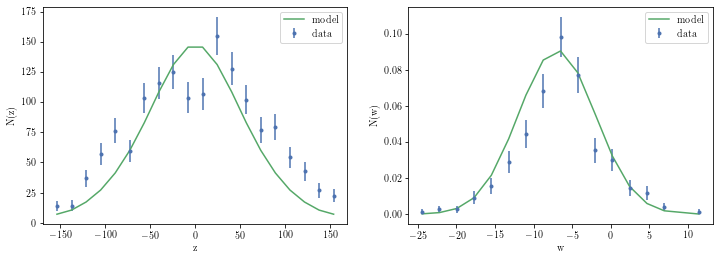

(55.60187432901083, -7.046468225264739)

In [12]:
print(theta.shape)
zmod = dddm.fz(zmid, theta)
wmod = dddm.fw(wmid, theta)

# plot
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].errorbar(zmid, znum, yerr=zerr, fmt='.', label='data')
ax[0].plot(zmid, zmod, label='model')
ax[0].set_xlabel('z')
ax[0].set_ylabel('N(z)')
ax[0].legend()
ax[1].errorbar(wmid, wnum, yerr=werr, fmt='.', label='data')
ax[1].plot(wmid, wmod, label='model')
ax[1].set_xlabel('w')
ax[1].set_ylabel('N(w)')
ax[1].legend()
plt.show()
dddm.log_prob(theta, zdata, wdata, locs, scales)

In [13]:
theta.shape

(33,)

In [14]:
dddm.log_prob(theta, zdata, wdata, locs, scales)

(55.60187432901083, -7.046468225264739)

# mcmc

In [28]:
from matplotlib import pyplot as plt
import numpy as np
from time import time
from glob import glob
from os.path import abspath, join
import sys 
from hammer import dddm
import vaex
root_dir = abspath(join('..', '..'))
data_dir = join(root_dir, 'Data')
sys.path.append(root_dir)
from utils import plot_chain, plot_corner, plot_fit, calculate_probs, style

In [29]:
style()

In [16]:
rhob = [
    0.0104, 0.0277, 0.0073, 0.0005, 0.0006, 0.0018,
    0.0018, 0.0029, 0.0072, 0.0216, 0.0056, 0.0015
]
sigmaz = [
    3.7, 7.1, 22.1, 39.0, 15.5, 7.5, 12.0, 
    18.0, 18.5, 18.5, 20.0, 20.0]
rhoDM = [0.016]
sigmaDD = [7]
log_hDD  = [np.log(20)]
log_nu0 = [5]
R = [3.4E-3]
zsun = [0]
w0 = [-7.]
log_sigmaw = [np.log(5.)]
log_a = [np.log(0.7)]
# sigmaw2 = [5.]
# a2 = [1.]

theta = np.array([rhob + sigmaz + rhoDM + sigmaDD + log_hDD + log_nu0 + R + zsun+w0 + log_sigmaw + log_a]).flatten()
theta.shape

(33,)

In [17]:
zfiles = glob(join(data_dir, 'Effective-Volume-v', '*.hdf5'))
zfiles.sort()
wfiles = glob(join(data_dir, 'Velocity-Distribution-v', 'gaia*.hdf5'))
wfiles.sort()
zfiles, wfiles

(['/home2/s20321005/Thesis-Project/Data/Effective-Volume-v/gaia_(-0.10)_(0.04).hdf5',
  '/home2/s20321005/Thesis-Project/Data/Effective-Volume-v/gaia_(0.04)_(0.10).hdf5',
  '/home2/s20321005/Thesis-Project/Data/Effective-Volume-v/gaia_(0.10)_(0.14).hdf5',
  '/home2/s20321005/Thesis-Project/Data/Effective-Volume-v/gaia_(0.14)_(0.18).hdf5',
  '/home2/s20321005/Thesis-Project/Data/Effective-Volume-v/gaia_(0.18)_(0.21).hdf5',
  '/home2/s20321005/Thesis-Project/Data/Effective-Volume-v/gaia_(0.21)_(0.24).hdf5',
  '/home2/s20321005/Thesis-Project/Data/Effective-Volume-v/gaia_(0.24)_(0.27).hdf5',
  '/home2/s20321005/Thesis-Project/Data/Effective-Volume-v/gaia_(0.27)_(0.29).hdf5',
  '/home2/s20321005/Thesis-Project/Data/Effective-Volume-v/gaia_(0.29)_(0.32).hdf5',
  '/home2/s20321005/Thesis-Project/Data/Effective-Volume-v/gaia_(0.32)_(0.34).hdf5',
  '/home2/s20321005/Thesis-Project/Data/Effective-Volume-v/gaia_(0.34)_(0.36).hdf5',
  '/home2/s20321005/Thesis-Project/Data/Effective-Volume-v/gaia_

In [18]:
index = 0
zfile = zfiles[index]
wfile = wfiles[index]
zdata = vaex.open(zfile)

zmid = zdata['z'].to_numpy()
znum = zdata['znum'].to_numpy()
zerr = zdata['err'].to_numpy()

wdata = vaex.open(wfile)

wmid = wdata['w'].to_numpy()
wnum = wdata['num'].to_numpy()
werr = wdata['err'].to_numpy()

zdata = (zmid, znum, zerr)
wdata = (wmid, wnum, werr)

In [19]:
ndim = 33
nwalkers = 2*ndim+2

In [35]:
locs = dict(
    rhoDM=-0.05,
    sigmaDD=1,
    log_hDD=0,
    log_nu0=4,
    R=3.4E-3,
    zsun=-50,
    w0=-10,
    log_sigmaw=0,
    log_a=-1
)

scales = dict(
    rhoDM=0.15,
    sigmaDD=9,
    log_hDD=np.log(100),
    log_nu0=2,
    R=0.6E-3,
    zsun=100,
    w0=5,
    log_sigmaw=3,
    log_a=2
)

keys = list(locs.keys())
locs = np.array(list(locs.values()))
scales = np.array(list(scales.values()))

[(k, loc, th, s+loc) for k, loc, th, s in zip(keys, locs, theta[24:], scales)]

[('rhoDM', -0.05, 0.016, 0.09999999999999999),
 ('sigmaDD', 1.0, 7.0, 10.0),
 ('log_hDD', 0.0, 2.995732273553991, 4.605170185988092),
 ('log_nu0', 4.0, 5.0, 6.0),
 ('R', 0.0034, 0.0034, 0.004),
 ('zsun', -50.0, 0.0, 50.0),
 ('w0', -10.0, -7.0, -5.0),
 ('log_sigmaw', 0.0, 1.6094379124341003, 3.0),
 ('log_a', -1.0, -0.35667494393873245, 1.0)]

In [36]:
p0 = dddm.generate_p0(nwalkers, locs, scales, kind=1)
p0.shape

(68, 33)

In [22]:
for p in p0:
    print(dddm.log_prob(p, zdata, wdata, locs, scales))

(36.270969966347444, -1028.835440590109)
(45.04160014149166, -1214.4204495161257)
(42.364519571375766, -506.2518107440681)
(48.52446681803166, -449.8889881692197)
(49.27758233544628, -504.4116152417606)
(40.67920318353617, -517.0448721116173)
(47.85990858090393, -4158.370779298174)
(46.188729719160726, -2332.9609097190646)
(45.74826097705226, -2071.909265106786)
(43.11567493955516, -74.20324220073222)
(42.174009228979436, -713.7103358268379)
(47.86041243249085, -8821.314424700142)
(44.13568287321781, -531.5269294159879)
(43.67228138048462, -843.6278965302248)
(41.5201950499519, -1080.0582081358068)
(44.03882674755553, -1438.364825244747)
(44.20047735331393, -1093.2934687476181)
(44.14493905289145, -4638.453817262589)
(38.04799655569822, -3151.94269687651)
(47.47039542251575, -12395.492678809645)
(47.7287387627235, -15383.638434079428)
(41.894667912930345, -3896.100129295347)
(42.674286945868985, -703.3347318769858)
(36.922142633465995, -18832.2436323335)
(48.456911364447926, -3348.1761

(33,)


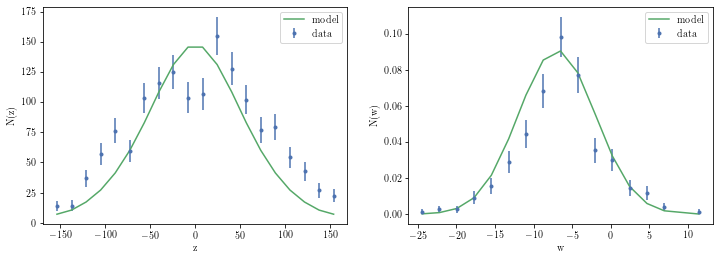

(55.60187432901083, -7.046468225264739)

In [23]:
print(theta.shape)
zmod = dddm.fz(zmid, theta)
wmod = dddm.fw(wmid, theta)

# plot
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].errorbar(zmid, znum, yerr=zerr, fmt='.', label='data')
ax[0].plot(zmid, zmod, label='model')
ax[0].set_xlabel('z')
ax[0].set_ylabel('N(z)')
ax[0].legend()
ax[1].errorbar(wmid, wnum, yerr=werr, fmt='.', label='data')
ax[1].plot(wmid, wmod, label='model')
ax[1].set_xlabel('w')
ax[1].set_ylabel('N(w)')
ax[1].legend()
plt.show()
dddm.log_prob(theta, zdata, wdata, locs, scales)

In [37]:
t0 = time()
chain = dddm.mcmc(500, nwalkers, p0, zdata, wdata, locs, scales, dz=1, verbose=True, parallel=True)
print(time() - t0, "s")
chain.shape

3.7052619457244873 s


(500, 68, 33)

(500, 68, 10)


100%|██████████| 10/10 [00:00<00:00, 26.85it/s]


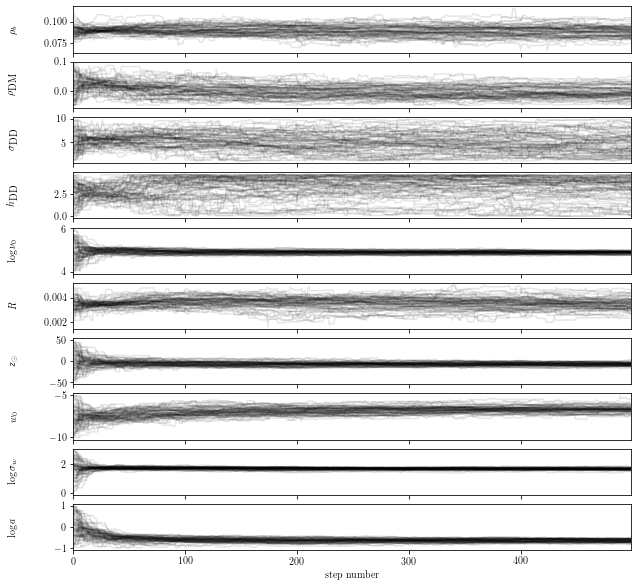

In [38]:
rhob = chain[:, :, :12].sum(axis=2).T
rhoDM = chain[:, :, 24].T
sigmaDD = chain[:, :, 25].T
log_hDD = chain[:, :, 26].T
nu0 = chain[:, :, 27].T
R = chain[:, :, 28].T
zsun = chain[:, :, 29].T
w0 = chain[:, :, 30].T
log_sigmaw = chain[:, :, 31].T
log_a = chain[:, :, 32].T

params = np.array([rhob, rhoDM, sigmaDD, log_hDD, nu0, R, zsun, w0, log_sigmaw, log_a]).T
print(params.shape)
labels = [r'$\rho_b$', r'$\rho_{\textup{DM}}$', r'$\sigma_{\textup{DD}}$', r'$h_{\textup{DD}}$', r'$\log \nu_0$', r'$R$', r'$z_{\odot}$', r'$w_0$', r'$\log \sigma_w$', r'$\log a$']
plot_chain(params, labels, figsize=(10,10))

In [39]:
p0_next = chain[-1, :, :]
t0 = time()
chain = dddm.mcmc(1000, nwalkers, p0_next, zdata, wdata, locs, scales, dz=1, verbose=True, parallel=True)
print(time() - t0, "s")
chain.shape

7.3538970947265625 s


(1000, 68, 33)

(1000, 68, 10)


100%|██████████| 10/10 [00:00<00:00, 28.65it/s]


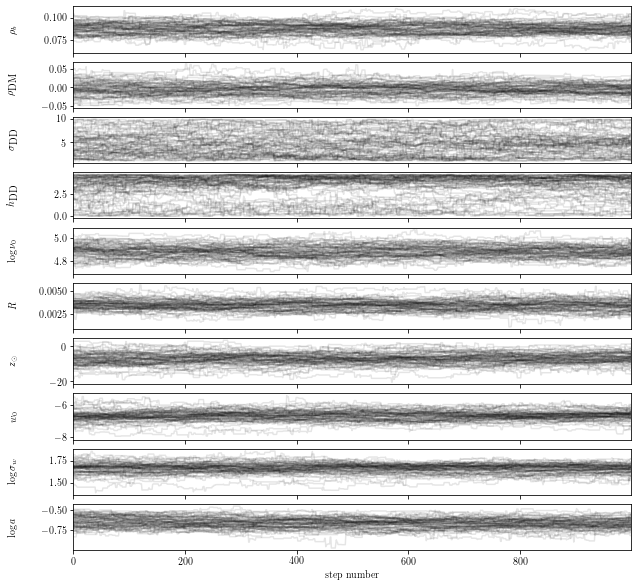

In [40]:
rhob = chain[:, :, :12].sum(axis=2).T
rhoDM = chain[:, :, 24].T
sigmaDD = chain[:, :, 25].T
log_hDD = chain[:, :, 26].T
nu0 = chain[:, :, 27].T
R = chain[:, :, 28].T
zsun = chain[:, :, 29].T
w0 = chain[:, :, 30].T
log_sigmaw = chain[:, :, 31].T
log_a = chain[:, :, 32].T

params = np.array([rhob, rhoDM, sigmaDD, log_hDD, nu0, R, zsun, w0, log_sigmaw, log_a]).T
print(params.shape)
labels = [r'$\rho_b$', r'$\rho_{\textup{DM}}$', r'$\sigma_{\textup{DD}}$', r'$h_{\textup{DD}}$', r'$\log \nu_0$', r'$R$', r'$z_{\odot}$', r'$w_0$', r'$\log \sigma_w$', r'$\log a$']
plot_chain(params, labels, figsize=(10,10))

In [52]:
from corner import corner

def plot_corner(chain, labels, burn=0, path=None, dpi=100):
    fig = corner(chain[burn:].reshape((-1, len(labels))), labels=labels, 
                 quantiles=[0.16, 0.5, 0.84],
                 show_titles=True, title_fmt=".2f", title_kwargs={"fontsize": 12})
    if path is not None:
        fig.savefig(path, dpi=dpi)

(1000, 68, 11)


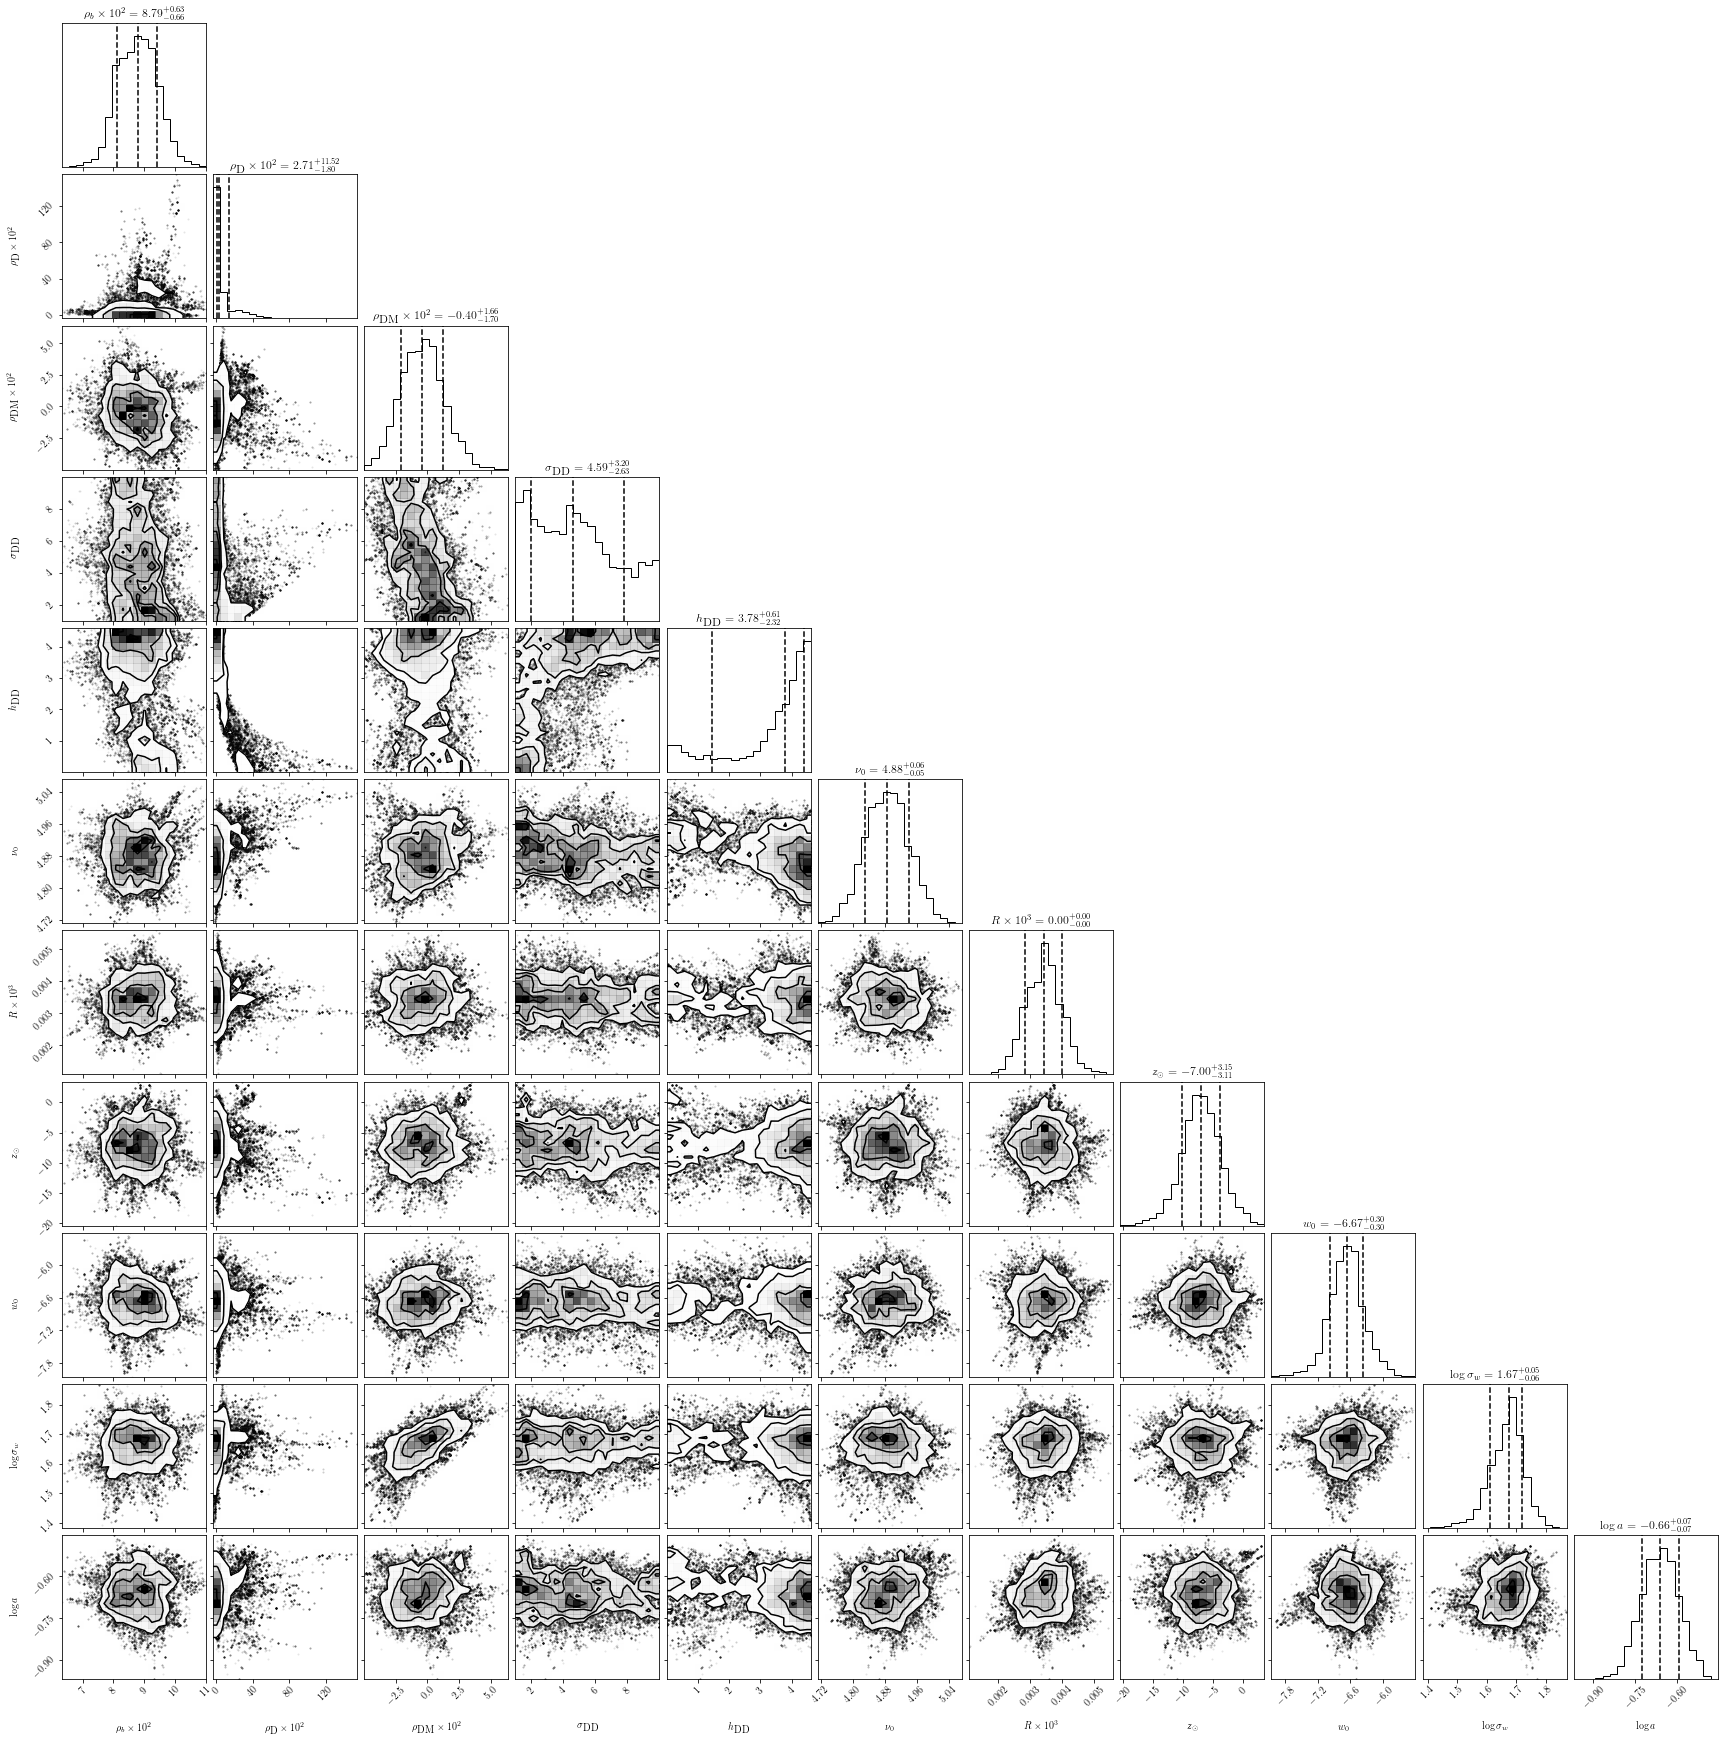

In [53]:
rhob = chain[:, :, :12].sum(axis=2).T/1E-2
rhoDM = chain[:, :, 24].T/1E-2
sigmaDD = chain[:, :, 25].T
log_hDD = chain[:, :, 26].T
rhoD = rhoDM + sigmaDD/(4*np.exp(log_hDD))/1E-2
nu0 = chain[:, :, 27].T
R = chain[:, :, 28].T
zsun = chain[:, :, 29].T
w0 = chain[:, :, 30].T
log_sigmaw = chain[:, :, 31].T
log_a = chain[:, :, 32].T

params = np.array([rhob, rhoD, rhoDM, sigmaDD, log_hDD, nu0, R, zsun, w0, log_sigmaw, log_a]).T
print(params.shape)

labels = [r'$\rho_b\times 10^2$', r'$\rho_{\textup{D}}\times 10^2$', r'$\rho_{\textup{DM}}\times 10^2$', r'$\sigma_{\textup{DD}}$', r'$h_{\textup{DD}}$', r'$\nu_0$', r'$R\times 10^3$', r'$z_{\odot}$', r'$w_0$', r'$\log \sigma_w$', r'$\log a$']
plot_corner(params, labels)

# fit

(68000, 33)


100%|██████████| 50000/50000 [00:33<00:00, 1479.08it/s]


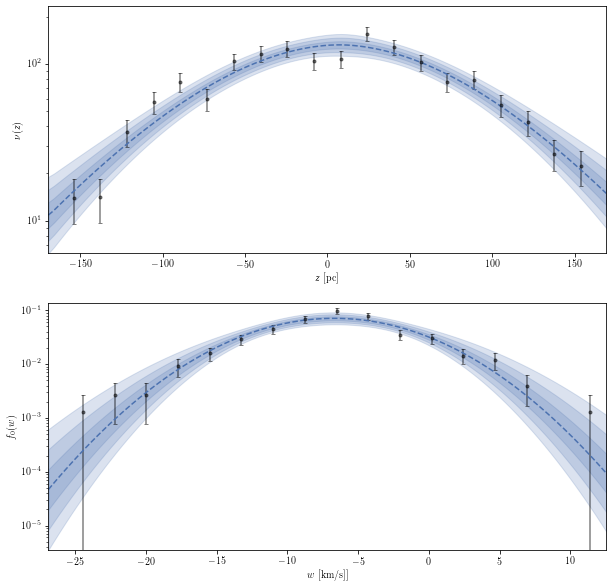

In [55]:
plot_fit(dddm, zdata, wdata, chain, ndim)

In [56]:
probs = calculate_probs(dddm, chain, ndim, zdata, wdata, locs, scales)

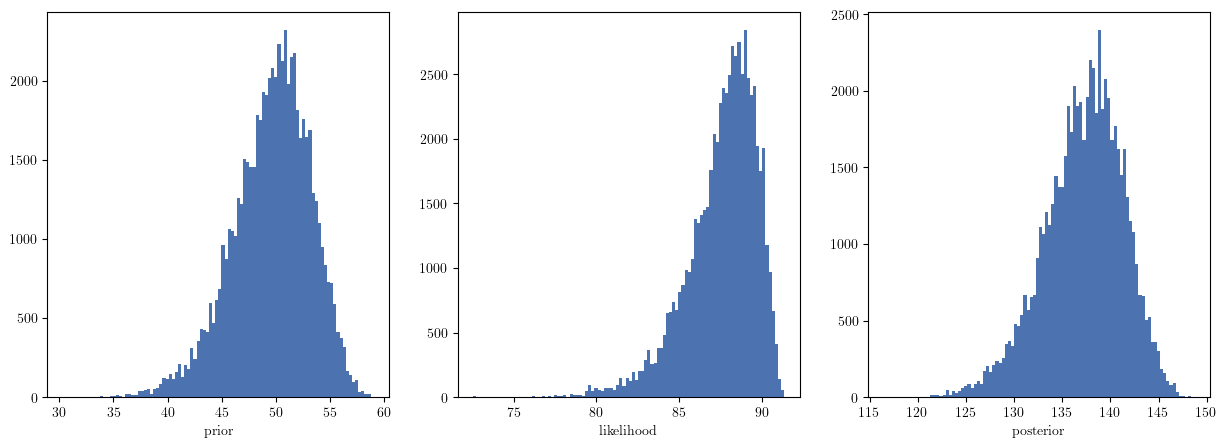

91.36376026484325

In [23]:
prior = probs[:, 0]
likelihood = probs[:, 2]
posterior = probs[:, 1]
# plot histogram of probabilities
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].hist(prior, bins=100)
axes[0].set_xlabel('prior')
axes[1].hist(likelihood, bins=100)
axes[1].set_xlabel('likelihood')
axes[2].hist(posterior, bins=100)
axes[2].set_xlabel('posterior')
plt.show()
likelihood.max()

# 2 comp

In [27]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import norm
from time import time
import os
import sys
parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)
from mcmc import dm
from mcmc import utils
from tqdm import tqdm

In [29]:
plt.style.use('seaborn-v0_8-deep') # I personally prefer seaborn for the graph style, but you may choose whichever you want.
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black",
          "text.usetex" : True,
          "font.family" : "serif",
          "font.serif" : ["Computer Modern"]}
plt.rcParams.update(params)

## tes potential

In [30]:
rhob = [0.0104, 0.0277, 0.0073, 0.0005, 0.0006, 0.0018,0.0018, 0.0029, 0.0072, 0.0216, 0.0056, 0.0015]
e_rhob = [0.00312, 0.00554, 0.00070, 0.00003, 0.00006, 0.00018, 0.00018, 0.00029, 0.00072, 0.00280,0.00100, 0.00050]
sigmaz = [3.7, 7.1, 22.1, 39.0, 15.5, 7.5, 12.0, 18.0, 18.5, 18.5, 20.0, 20.0]
e_sigmaz = [0.2, 0.5, 2.4, 4.0, 1.6, 2.0, 2.4, 1.8, 1.9, 4.0, 5.0, 5.0]
rhoDM = [0.016]
log_nu0 = [-3]
R = [3.4E-3]
zsun = [0]
w0 = [-7]
log_sigmaw1 = [5.]
log_a1 = [5.]
log_sigmaw2 = [10.]
log_a2 = [2.]

theta = np.array([rhob + sigmaz + rhoDM + log_nu0 + R + zsun + w0 + log_sigmaw1 + log_a1 + log_sigmaw2 + log_a2]).flatten()
theta.shape

(33,)

In [31]:
z_start = -1000
z_end = 1000
dz = 1.

z = np.arange(z_start, z_end, dz)
print(z)
phi = dm.potential(z, theta)

[-1000.  -999.  -998. ...   997.   998.   999.]


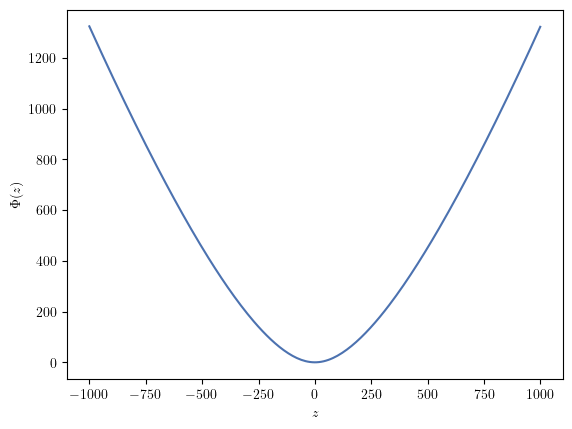

In [32]:
plt.plot(z, phi)
plt.xlabel(r'$z$')
plt.ylabel(r'$\Phi(z)$')
plt.show()

# tes fz

In [61]:
fz = dm.fz(z, theta)
fz

array([140.16450646, 140.17637465, 140.1882439 , ..., 140.2001142 ,
       140.1882439 , 140.17637465])

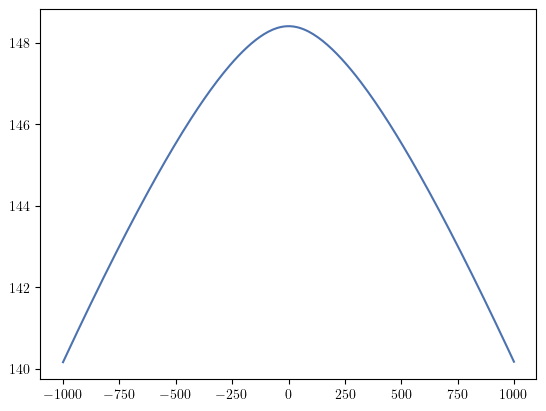

In [62]:
plt.plot(z, fz)

# tes fw

In [35]:
w = np.linspace(-50, 30, 1000)

fw = dm.fw(w, theta)
fw.shape

(1000,)

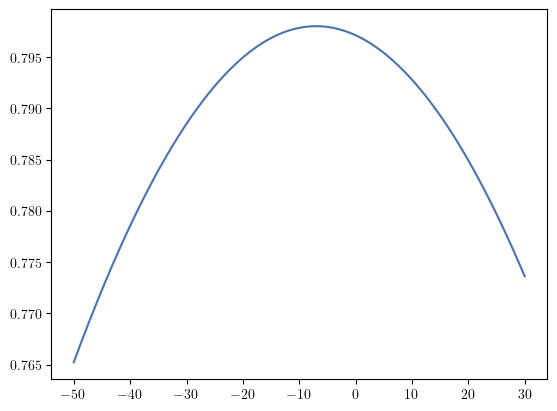

In [36]:
plt.plot(w, fw)

# tes log_prob

In [89]:
rhob = [0.0104, 0.0277, 0.0073, 0.0005, 0.0006, 0.0018,0.0018, 0.0029, 0.0072, 0.0216, 0.0056, 0.0015]
e_rhob = [0.00312, 0.00554, 0.00070, 0.00003, 0.00006, 0.00018, 0.00018, 0.00029, 0.00072, 0.00280,0.00100, 0.00050]
sigmaz = [3.7, 7.1, 22.1, 39.0, 15.5, 7.5, 12.0, 18.0, 18.5, 18.5, 20.0, 20.0]
e_sigmaz = [0.2, 0.5, 2.4, 4.0, 1.6, 2.0, 2.4, 1.8, 1.9, 4.0, 5.0, 5.0]
rhoDM = [0.016]
log_nu0 = [6.2]
R = [3.4E-3]
zsun = [20]
w0 = [-7]
log_sigmaw1 = [1.5]
log_a1 = [7.]
log_sigmaw2 = [3.]
log_a2 = [3.]

theta = np.array([rhob + sigmaz + rhoDM + log_nu0 + R + zsun + w0 + log_sigmaw1 + log_a1 + log_sigmaw2 + log_a2]).flatten()
theta.shape

(33,)

In [38]:
zdata = np.loadtxt('data/z2.csv', skiprows=1, delimiter=',')
zmid = zdata[:, 0]
znum = zdata[:, 1]
zerr = zdata[:, 2]

wdata = np.loadtxt('data/w2.csv', skiprows=1, delimiter=',')
wmid = wdata[:, 0]
wnum = wdata[:, 1]
werr = wdata[:, 2]
zbound = 50

zdata = (zmid, znum, zerr)
wdata = (wmid, wnum, werr)

In [45]:
locs = dict(
    rhoDM=-0.02,
    log_nu0=5,
    R=3.4E-3,
    zsun=-20,
    w0=-10,
    log_sigmaw1=0,
    log_a1=4,
    log_sigmaw2=6,
    log_a2=0
)

scales = dict(
    rhoDM=0.08,
    log_nu0=4,
    R=0.6E-3,
    zsun=40,
    w0=5,
    log_sigmaw=6,
    log_a=12,
    log_sigmaw2=16,
    log_a2=4
)

keys = list(locs.keys())
locs = np.array(list(locs.values()))
scales = np.array(list(scales.values()))

[(k, loc, th, s+loc) for k, loc, th, s in zip(keys, locs, theta[24:], scales)]

[('rhoDM', -0.02, 0.016, 0.06),
 ('log_nu0', 5.0, 7.0, 9.0),
 ('R', 0.0034, 0.0034, 0.004),
 ('zsun', -20.0, 0.0, 20.0),
 ('w0', -10.0, -7.0, -5.0),
 ('log_sigmaw1', 0.0, 5.0, 6.0),
 ('log_a1', 4.0, 5.0, 16.0),
 ('log_sigmaw2', 6.0, 10.0, 22.0),
 ('log_a2', 0.0, 2.0, 4.0)]

In [46]:
dm.log_prob(np.array([theta]), zdata, wdata, locs, scales)

(array([55.39745944]), array([-1439816.96221533]))

# mcmc

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from time import time
import os
import sys
parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)
plt.style.use('seaborn-v0_8-deep') # I personally prefer seaborn for the graph style, but you may choose whichever you want.
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black",
          "text.usetex" : True,
          "font.family" : "serif",
          "font.serif" : ["Computer Modern"]}
plt.rcParams.update(params)

/home/alisyaifudin/anaconda3/envs/maturin/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
rhob = [0.0104, 0.0277, 0.0073, 0.0005, 0.0006, 0.0018,0.0018, 0.0029, 0.0072, 0.0216, 0.0056, 0.0015]
e_rhob = [0.00312, 0.00554, 0.00070, 0.00003, 0.00006, 0.00018, 0.00018, 0.00029, 0.00072, 0.00280,0.00100, 0.00050]
sigmaz = [3.7, 7.1, 22.1, 39.0, 15.5, 7.5, 12.0, 18.0, 18.5, 18.5, 20.0, 20.0]
e_sigmaz = [0.2, 0.5, 2.4, 4.0, 1.6, 2.0, 2.4, 1.8, 1.9, 4.0, 5.0, 5.0]
rhoDM = [0.016]
log_nu0 = [5.]
R = [3.4E-3]
zsun = [0]
w0 = [-7]
log_sigmaw1 = [5.]
log_a1 = [5.]
log_sigmaw2 = [10.]
log_a2 = [2.]

theta = np.array([rhob + sigmaz + rhoDM + log_nu0 + R + zsun + w0 + log_sigmaw1 + log_a1 + log_sigmaw2 + log_a2]).flatten()
theta.shape

(33,)

In [64]:
ndim = 33
nwalkers = 2*ndim+2
nsteps = 10

In [100]:
locs = dict(
    rhoDM=-0.02,
    log_nu0=5,
    R=3.4E-3,
    zsun=-20,
    w0=-10,
    log_sigmaw1=0,
    log_a1=5,
    log_sigmaw2=2,
    log_a2=0
)

scales = dict(
    rhoDM=0.08,
    log_nu0=4,
    R=0.6E-3,
    zsun=40,
    w0=5,
    log_sigmaw=3,
    log_a=5,
    log_sigmaw2=10,
    log_a2=5
)

keys = list(locs.keys())
locs = np.array(list(locs.values()))
scales = np.array(list(scales.values()))

[(k, loc, th, s+loc) for k, loc, th, s in zip(keys, locs, theta[24:], scales)]

[('rhoDM', -0.02, 0.016, 0.06),
 ('log_nu0', 5.0, 6.2, 9.0),
 ('R', 0.0034, 0.0034, 0.004),
 ('zsun', -20.0, 20.0, 20.0),
 ('w0', -10.0, -7.0, -5.0),
 ('log_sigmaw1', 0.0, 1.5, 3.0),
 ('log_a1', 5.0, 7.0, 10.0),
 ('log_sigmaw2', 2.0, 3.0, 12.0),
 ('log_a2', 0.0, 3.0, 5.0)]

In [101]:
p0 = dm.generate_p0(nwalkers, locs, scales, kind=2)
p0.shape

(68, 33)

In [102]:
zdata = np.loadtxt('data/z2.csv', skiprows=1, delimiter=',')
zmid = zdata[:, 0]
znum = zdata[:, 1]
zerr = zdata[:, 2]
dz = zmid[1] - zmid[0]

wdata = np.loadtxt('data/w2.csv', skiprows=1, delimiter=',')
wmid = wdata[:, 0]
wnum = wdata[:, 1]
werr = wdata[:, 2]
dw = wmid[1] - wmid[0]
zbound = 50

zdata = (zmid, znum, zerr)
wdata = (wmid, wnum, werr)

In [103]:
dm.log_prob(p0, zdata, wdata, locs, scales)

(array([48.83935094, 45.84632843, 45.14277965, 44.03794938, 47.43156953,
        45.75984474, 49.66326377, 42.47245914, 48.77490689, 42.23781262,
        41.35694174, 46.03482764, 35.23015379, 39.16854958, 39.34117177,
        45.71853455, 35.15231388, 40.59400102, 41.73023484, 44.75425064,
        45.87181235, 45.06358411, 41.32700647, 42.1889301 , 47.8807048 ,
        48.04144218, 48.36185185, 49.38631412, 44.83322894, 43.78676988,
        48.01706816, 45.63349461, 45.5830056 , 46.40137304, 38.70281102,
        48.11550755, 47.50882373, 49.02743698, 41.70916075, 44.40224399,
        48.30524688, 46.56733113, 43.10068231, 50.52653373, 44.16697017,
        44.14209266, 48.63112327, 39.81477179, 40.15627009, 46.92586501,
        51.00601076, 50.29510689, 38.94861704, 46.64630927, 37.06456698,
        47.35321035, 49.14724785, 50.47297287, 40.71255988, 49.91548437,
        48.74954946, 35.41640476, 47.39650322, 47.55098661, 38.05892262,
        44.33259877, 44.37469921, 43.01296613]),
 a

(33,)


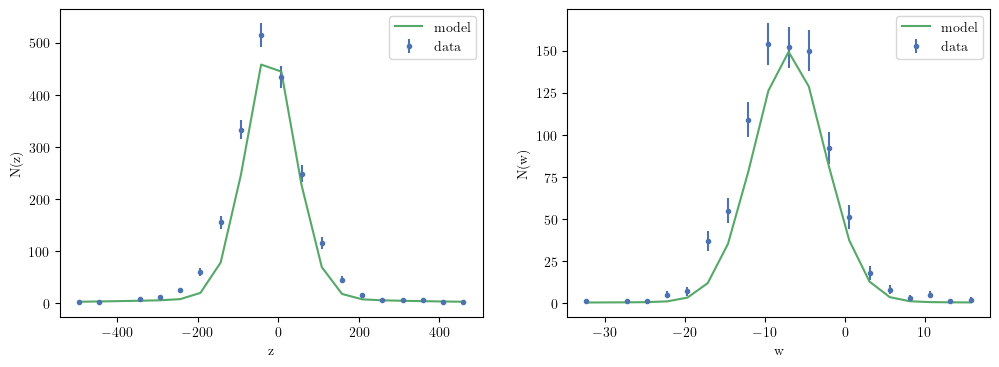

(array([-inf]), array([-inf]))

In [104]:
print(theta.shape)
zmod = dm.fz(zmid, theta)
wmod = dm.fw(wmid, theta)

# plot
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].errorbar(zmid, znum, yerr=zerr, fmt='.', label='data')
ax[0].plot(zmid, zmod, label='model')
ax[0].set_xlabel('z')
ax[0].set_ylabel('N(z)')
ax[0].legend()
ax[1].errorbar(wmid, wnum, yerr=werr, fmt='.', label='data')
ax[1].plot(wmid, wmod, label='model')
ax[1].set_xlabel('w')
ax[1].set_ylabel('N(w)')
ax[1].legend()
plt.show()
dm.log_prob(np.array([theta]), zdata, wdata, locs, scales)

In [ ]:
t0 = time()
sampler = dm.run_mcmc(500, nwalkers, p0, zdata, wdata, locs, scales, dz=1, verbose=True)
print(time() - t0, "s")
chain, probs = sampler[:,:,:-3], sampler[:,:,-3:]

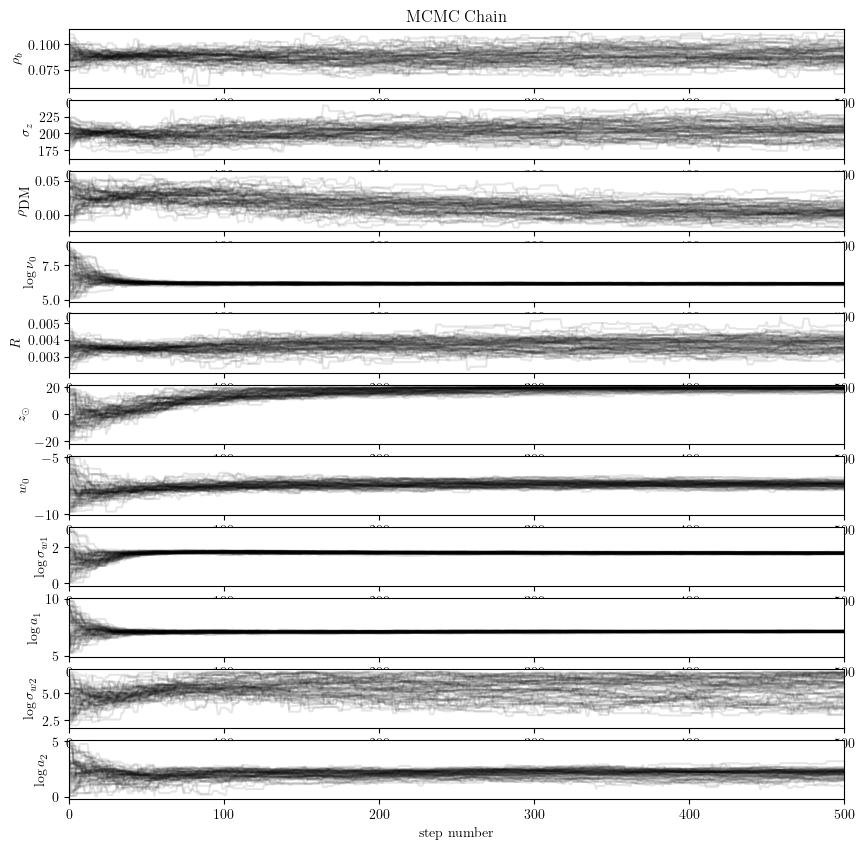

In [99]:
rhob = chain[:, :, :12].sum(axis=2).T
sigmaz = chain[:, :, 12:24].sum(axis=2).T
rhoDM = chain[:, :, 24].T
nu0 = chain[:, :, 25].T
R = chain[:, :, 26].T
zsun = chain[:, :, 27].T
w0 = chain[:, :, 28].T
log_sigmaw1 = chain[:, :, 29].T
log_a1 = chain[:, :, 30].T
log_sigmaw2 = chain[:, :, 31].T
log_a2 = chain[:, :, 32].T

params = np.array([rhob, sigmaz, rhoDM, nu0, R, zsun, w0, log_sigmaw1, log_a1, log_sigmaw2, log_a2]).T

labels = labels = [r'$\rho_b$', r'$\sigma_z$', r'$\rho_{\textup{DM}}$', r'$\log \nu_0$', r'$R$', r'$z_{\odot}$', r'$w_0$', r'$\log \sigma_{w1}$', r'$\log a_1$', r'$\log \sigma_{w2}$', r'$\log a_2$']
utils.plot_chain(params, labels)

In [ ]:
p0_next = chain[-1, :, :]
t0 = time()
sampler = dm.run_mcmc(1000, nwalkers, p0_next, zdata, wdata, locs, scales, dz=1, verbose=True)
print(time() - t0, "s")
chain, probs = sampler[:,:,:-3], sampler[:,:,-3:]

In [ ]:
rhob = chain[:, :, :12].sum(axis=2).T
sigmaz = chain[:, :, 12:24].sum(axis=2).T
rhoDM = chain[:, :, 24].T
nu0 = chain[:, :, 25].T
R = chain[:, :, 26].T
zsun = chain[:, :, 27].T
w0 = chain[:, :, 28].T
log_sigmaw1 = chain[:, :, 29].T
log_a1 = chain[:, :, 30].T
log_sigmaw2 = chain[:, :, 31].T
log_a2 = chain[:, :, 32].T

params = np.array([rhob, sigmaz, rhoDM, nu0, R, zsun, w0, log_sigmaw1, log_a1, log_sigmaw2, log_a2]).T

labels = labels = [r'$\rho_b$', r'$\sigma_z$', r'$\rho_{\textup{DM}}$', r'$\log \nu_0$', r'$R$', r'$z_{\odot}$', r'$w_0$', r'$\log \sigma_{w1}$', r'$\log a_1$', r'$\log \sigma_{w2}$', r'$\log a_2$']
utils.plot_chain(params, labels)

In [ ]:
rhob_f = rhob/1E-2
sigmaz_f = sigmaz
rhoDM_f = rhoDM/1E-2
nu0_f = nu0
R_f = R/1E-3
zsun_f = zsun
w0_f = w0
log_sigmaw1_f = log_sigmaw1
log_a1_f = log_a1
log_sigmaw2_f = log_sigmaw2
log_a2_f = log_a2

flat_samples = np.array([rhob_f, sigmaz_f, rhoDM_f, nu0_f, R_f, zsun_f, w0_f, log_sigmaw1_f, log_a1_f, log_sigmaw2_f, log_a2_f]).T

labels = [r'$\rho_b\times 10^2$', r'$\sigma_z$', r'$\rho_{\textup{DM}}\times 10^2$', r'$\nu_0$', r'$R\times 10^3$', r'$z_{\odot}$', r'$w_0$', r'$\log \sigma_{w1}$', r'$\log a_1$', r'$\log \sigma_{w2}$', r'$\log a_2$']
utils.plot_corner(flat_samples, labels)

In [ ]:
def plot_fit(zdata, wdata, chain, ndim, n=50000, alpha=0.2, path=None, dpi=100):
    zmid, znum, zerr = zdata
    wmid, wnum, werr = wdata
    
    flat_samples = chain.reshape((-1, ndim))
    zs = np.linspace(zmid.min()*1.1, zmid.max()*1.1, 100)
    ws = np.linspace(wmid.min()*1.1, wmid.max()*1.1, 100)
    fzs = np.empty((n, len(zs)))
    fws = np.empty((n, len(ws)))
    for i in tqdm(range(n)):
        ind = np.random.randint(len(flat_samples))
        theta = flat_samples[ind]
        fzs[i] = dm.fz(zs, theta ,1.)
        fws[i] = dm.fw(ws, theta ,1.)
    fz_log_mean = np.log(fzs).mean(axis=0)
    fz_log_std = np.log(fzs).std(axis=0)
    fz_mean = np.exp(fz_log_mean)

    fw_log_mean = np.log(fws).mean(axis=0)
    fw_log_std = np.log(fws).std(axis=0)
    fw_mean = np.exp(fw_log_mean)

    fig, axes = plt.subplots(2, 1, figsize=(10, 10))
    axes[0].errorbar(zmid, znum, yerr=zerr, color='k', alpha=0.5, capsize=2, fmt=".")
    axes[0].fill_between(zs, np.exp(fz_log_mean - 3*fz_log_std), np.exp(fz_log_mean + 3*fz_log_std), alpha=alpha, color="C0")
    axes[0].fill_between(zs, np.exp(fz_log_mean - 2*fz_log_std), np.exp(fz_log_mean + 2*fz_log_std), alpha=alpha, color="C0")
    axes[0].fill_between(zs, np.exp(fz_log_mean - fz_log_std), np.exp(fz_log_mean + fz_log_std), alpha=alpha, color="C0")
    axes[0].plot(zs, fz_mean, c="C0", ls="--")
    axes[0].set_ylabel(r'$\nu(z)$')
    axes[0].set_xlabel(r'$z$ [pc]')
    axes[0].set_yscale('log')

    axes[1].errorbar(wmid, wnum, yerr=werr, color='k', alpha=0.5, capsize=2, fmt=".")
    axes[1].fill_between(ws, np.exp(fw_log_mean - 3*fw_log_std), np.exp(fw_log_mean + 3*fw_log_std), alpha=alpha, color="C0")
    axes[1].fill_between(ws, np.exp(fw_log_mean - 2*fw_log_std), np.exp(fw_log_mean + 2*fw_log_std), alpha=alpha, color="C0")
    axes[1].fill_between(ws, np.exp(fw_log_mean - fw_log_std), np.exp(fw_log_mean + fw_log_std), alpha=alpha, color="C0")
    axes[1].plot(ws, fw_mean, c="C0", ls="--")
    axes[1].set_ylabel(r'$f_0(w)$')
    axes[1].set_xlabel(r'$w$ [km/s]]')
    axes[1].set_yscale('log')
    if path is not None:
        fig.savefig(path, dpi=dpi)
    plt.show()

In [ ]:
plot_fit(zdata, wdata, chain, ndim)